# **Data Visualization with SQL**


The data set is presented in the form of a RDBMS.

For data extraction is used SQL queries.

## Objectives

-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


# Hands-on


Connect to the database.

In [1]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("survey_data_db.sqlite") # open a database connection

Import pandas module.

In [2]:
import pandas as pd

### List and decribe of tables

In [3]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master
WHERE type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [4]:
table_name = 'master'  # the table to be describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


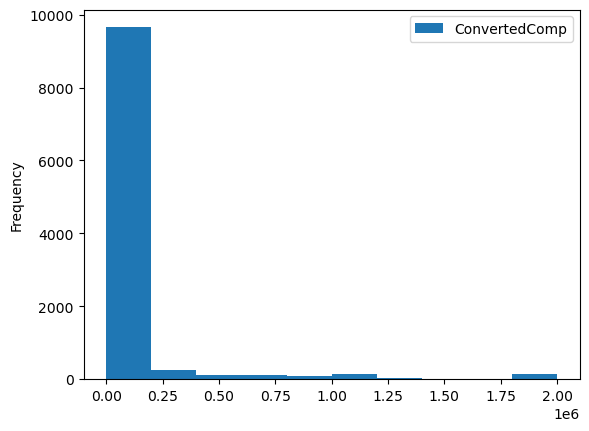

In [5]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
data.plot( kind= 'hist')
plt.show()

### Box Plots


Plot a box plot of `Age.`


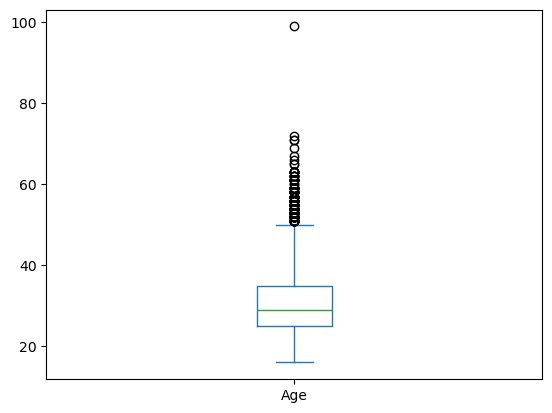

In [6]:
QUERY = """
SELECT Age
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
data.plot( kind= 'box')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Scatter plot of `Age` and `WorkWeekHrs.`


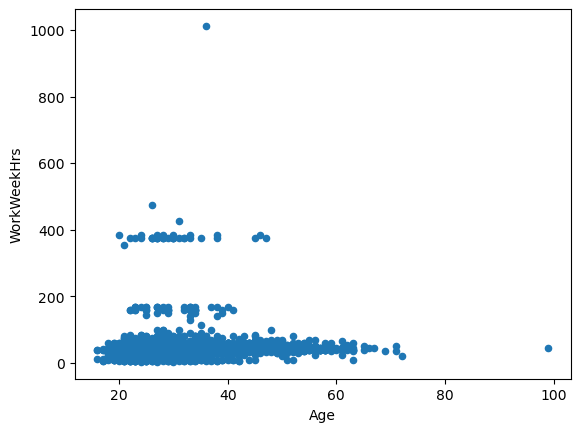

In [7]:
QUERY = """
SELECT Age ,WorkWeekHrs 
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
data.plot( kind= 'scatter', x='Age', y = 'WorkWeekHrs')
plt.show()

### Bubble Plots


Bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


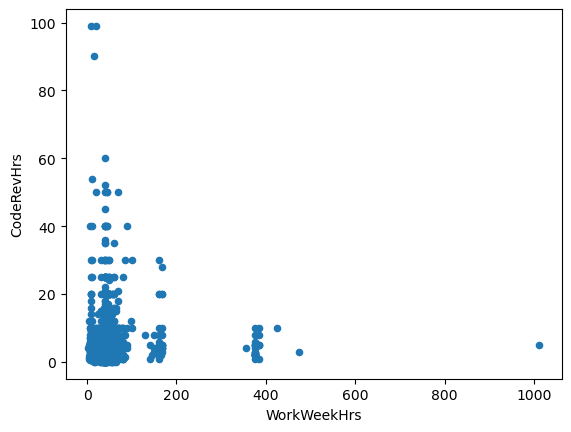

In [8]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
data.plot( kind= 'scatter', x = 'WorkWeekHrs', y = 'CodeRevHrs')
plt.show()

## Visualizing composition of data


### Pie Charts


Pie chart of the top 5 databases that respondents wish to learn next year. 


In [9]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table' AND Table_Name LIKE '%Desire%'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)
#cur.execute(QUERY)


,Table_Name
0,LanguageDesireNextYear
1,DatabaseDesireNextYear
2,PlatformDesireNextYear
3,WebFrameDesireNextYear
4,MiscTechDesireNextYear


In [10]:
QUERY = """
SELECT * FROM LanguageDesireNextYear 
LIMIT 5
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)
#cur.execute(QUERY)

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [11]:
QUERY = """
SELECT SUM(Respondent) as LanguageDesireNextYear 
FROM LanguageDesireNextYear
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df1 = pd.read_sql_query(QUERY,conn)
df1 = df1.transpose()
df1

,0
LanguageDesireNextYear,694290192


In [12]:
QUERY = """
SELECT SUM(Respondent) as DatabaseDesireNextYear 
FROM DatabaseDesireNextYear
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df2 = pd.read_sql_query(QUERY,conn)
df2 = df2.transpose()

In [13]:
QUERY = """
SELECT SUM(Respondent) as PlatformDesireNextYear 
FROM PlatformDesireNextYear
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df3 =pd.read_sql_query(QUERY,conn)
df3 = df3.transpose()

In [14]:
QUERY = """
SELECT SUM(Respondent) as WebFrameDesireNextYear 
FROM WebFrameDesireNextYear
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df4 = pd.read_sql_query(QUERY,conn)
df4 = df4.transpose()

In [15]:
QUERY = """
SELECT SUM(Respondent) as MiscTechDesireNextYear 
FROM MiscTechDesireNextYear
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df5 = pd.read_sql_query(QUERY,conn)
df5 = df5.transpose()


In [16]:
from functools import reduce
dfs = [df1, df2, df3, df4, df5]
df_final = pd.concat(dfs)
df_final.columns = ['Respondent']
df_final

,Respondent
LanguageDesireNextYear,694290192
DatabaseDesireNextYear,368833033
PlatformDesireNextYear,550224487
WebFrameDesireNextYear,303690985
MiscTechDesireNextYear,330847312


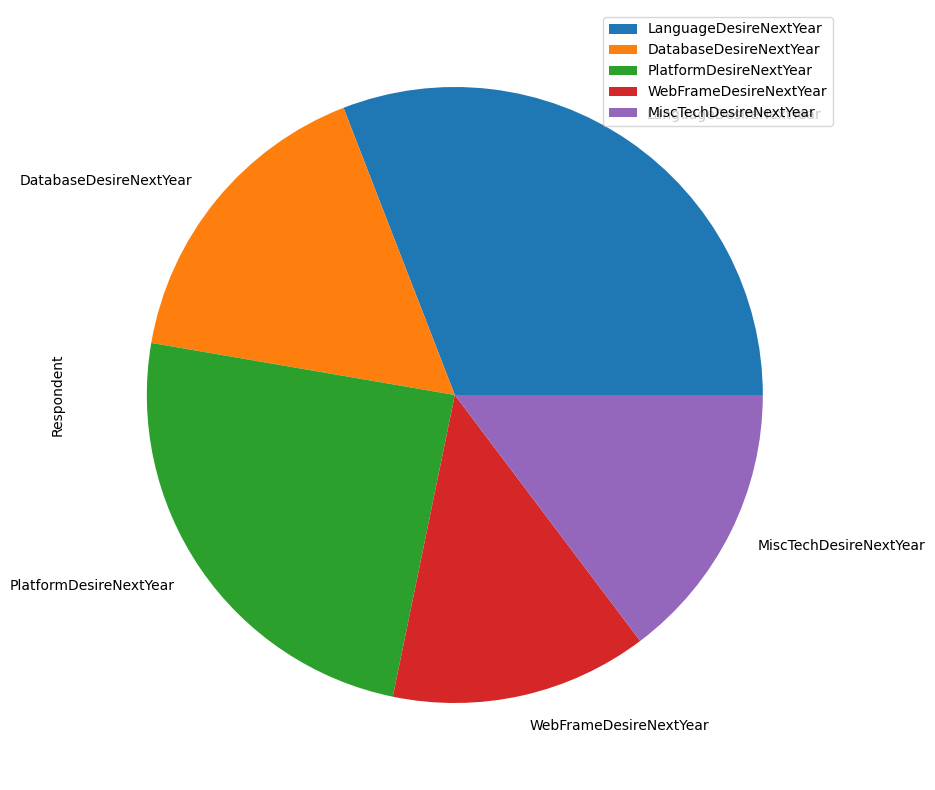

In [17]:
df_final.plot.pie(y = 'Respondent',figsize=(10, 10))
plt.show()

In [18]:
df_final.loc['DatabaseDesireNextYear','Respondent'] / df_final['Respondent'].sum() * 100


16.407995402047987

### In the pie chart of top 5 databases, respondents wish to learn next year, what is the percentage of Mongodb?



In [19]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(DatabaseDesireNextYear) as NumOf
FROM DatabaseDesireNextYear 
GROUP BY DatabaseDesireNextYear
ORDER BY NumOf DESC
LIMIT 5
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd_db = pd.read_sql_query(QUERY,conn)
pd_db.set_index('DatabaseDesireNextYear',inplace = True)
pd_db

,NumOf
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


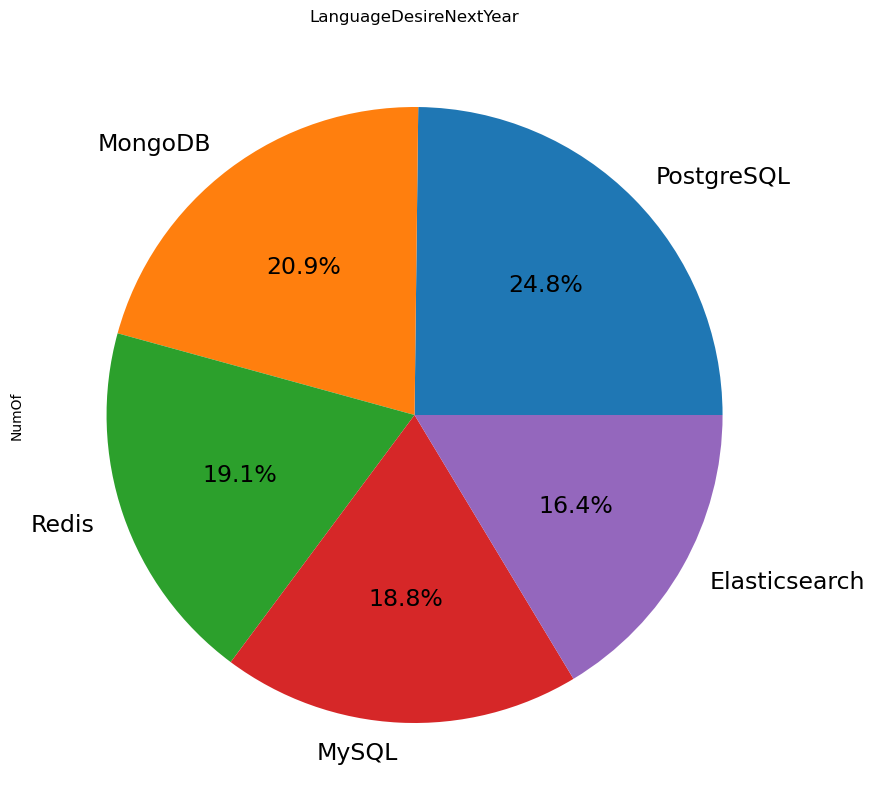

In [20]:
pd_db.plot(kind = 'pie', y = 'NumOf',figsize=(10, 10),
             autopct='%1.1f%%', startangle=0, legend=False,
             fontsize=17)
plt.title("LanguageDesireNextYear")
plt.show()

### In the list of most popular languages respondents wish to learn next year, what is the rank of Python?



In [21]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(LanguageDesireNextYear) as NumOf
FROM LanguageDesireNextYear 
GROUP BY LanguageDesireNextYear
ORDER BY NumOf DESC
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd_lang = pd.read_sql_query(QUERY,conn)
pd_lang.set_index('LanguageDesireNextYear',inplace = True)
pd_lang.head()


,NumOf
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


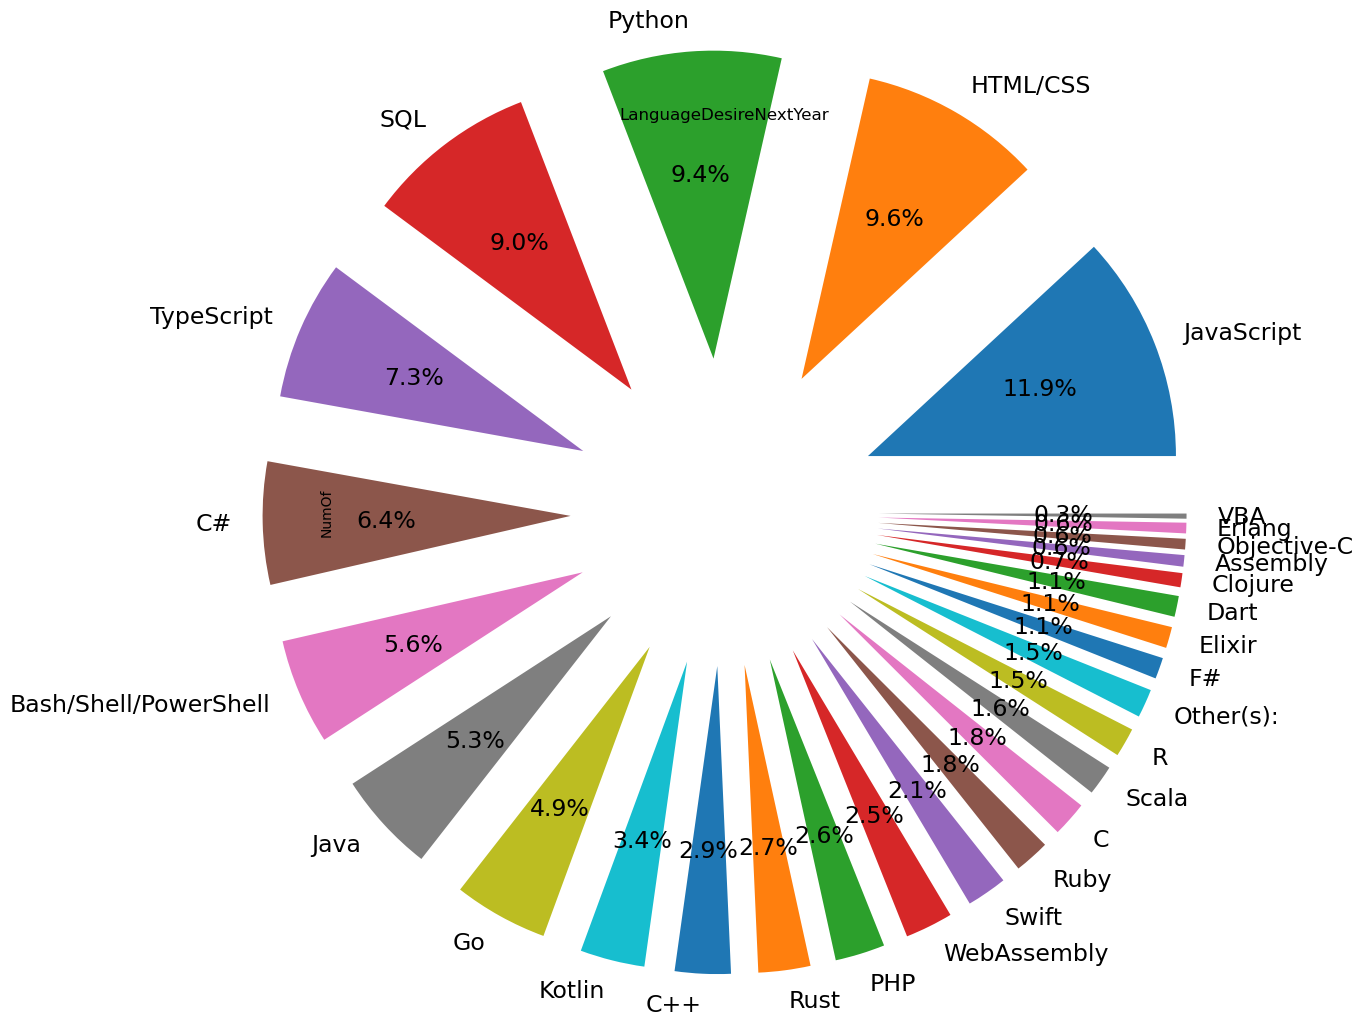

In [22]:
ex = [0.5 for i in range(pd_lang.shape[0])]
ex = tuple (ex)

#Una opcion es hacer ctrl c ctrl v con la tupla y editar a mano

#Explode

pd_lang.plot(kind = 'pie', y = 'NumOf',figsize=(10, 10),
             autopct='%1.1f%%', startangle=0, legend=False, explode = ex ,
             fontsize=17)
plt.title("LanguageDesireNextYear")
plt.show()

### How many respondents indicated that they currently work with 'SQL'? 

In [23]:
QUERY = """
SELECT LanguageWorkedWith, COUNT(LanguageWorkedWith) as NUMBER
FROM LanguageWorkedWith 
GROUP BY LanguageWorkedWith
ORDER BY Respondent DESC
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd_ww = pd.read_sql_query(QUERY,conn)
pd_ww.set_index('LanguageWorkedWith',inplace = True)
pd_ww

,NUMBER
LanguageWorkedWith,
Dart,237
Clojure,164
Elixir,187
Scala,492
Assembly,437
Erlang,98
F#,158
Kotlin,751
Go,1114


### How many respondents indicated that they work on 'MySQL' only?

In [24]:
## NO aparece sql voy a hacerlo con SQL
QUERY = """ 
SELECT Respondent, COUNT (LanguageWorkedWith) AS NumOf
FROM LanguageWorkedWith 
WHERE Respondent IN (SELECT Respondent
                    FROM LanguageWorkedWith 
                    WHERE LanguageWorkedWith = 'SQL')
GROUP BY Respondent
ORDER BY NumOf
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd_ww = pd.read_sql_query(QUERY,conn)
pd_ww

,Respondent,NumOf
0,7331,1
1,7794,1
2,13137,1
3,13791,1
4,15458,1
...,...,...
7101,10544,17
7102,15378,17
7103,21543,17
7104,2482,18


In [25]:
# 474 

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [26]:
QUERY = """
SELECT Age, AVG(WorkWeekHrs) AS MedianWorkWeekHrs, AVG(CodeRevHrs) AS MedianCodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
ORDER BY age
"""
data = pd.read_sql_query(QUERY,conn)
data
#data.plot( kind= 'area', x = 'WorkWeekHrs', y = 'CodeRevHrs')
#plt.show()

,Age,MedianWorkWeekHrs,MedianCodeRevHrs
0,30.0,43.131579,4.696858
1,31.0,41.602746,4.701923
2,32.0,42.650207,5.008557
3,33.0,44.486952,4.724311
4,34.0,43.147583,4.869902
5,35.0,42.451550,4.745130


In [27]:
QUERY = """
SELECT Age, AVG(WorkWeekHrs) AS MedianWorkWeekHrs, AVG(CodeRevHrs) AS MedianCodeRevHrs
FROM (SELECT Age,WorkWeekHrs,CodeRevHrs 
      FROM master
      WHERE Age BETWEEN 30 AND 35
      ORDER BY age)

GROUP BY Age
"""
data = pd.read_sql_query(QUERY,conn)
data
#data.plot( kind= 'area', x = 'WorkWeekHrs', y = 'CodeRevHrs')
#plt.show()

,Age,MedianWorkWeekHrs,MedianCodeRevHrs
0,30.0,43.131579,4.696858
1,31.0,41.602746,4.701923
2,32.0,42.650207,5.008557
3,33.0,44.486952,4.724311
4,34.0,43.147583,4.869902
5,35.0,42.451550,4.745130


In [28]:
QUERY = """
SELECT Age , AVG(WorkWeekHrs)
FROM (SELECT Age, WorkWeekHrs
      FROM master
      ORDER BY WorkWeekHrs
      LIMIT 2 - (SELECT COUNT(*) FROM master) % 2    -- odd 1, even 2
                 OFFSET (SELECT (COUNT(*) - 1) / 2
                         FROM master))

"""
data = pd.read_sql_query(QUERY,conn)
data            

,Age,AVG(WorkWeekHrs)
0,29.0,40.0


In [29]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
ORDER BY age
"""
data = pd.read_sql_query(QUERY,conn)
#data.head(15)
data.groupby('Age').median()
#data.plot( kind= 'area', x = 'WorkWeekHrs', y = 'CodeRevHrs')
#plt.show()

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [30]:
QUERY = """
SELECT Age, ConvertedComp as MedianConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
ORDER BY age
"""
data = pd.read_sql_query(QUERY,conn)
#data.head(15)
df_age = data.groupby('Age').median()
#data.plot( kind= 'area', x = 'WorkWeekHrs', y = 'CodeRevHrs')
#plt.show()
df_age.reset_index(inplace=True)

In [31]:
df_age

,Age,MedianConvertedComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


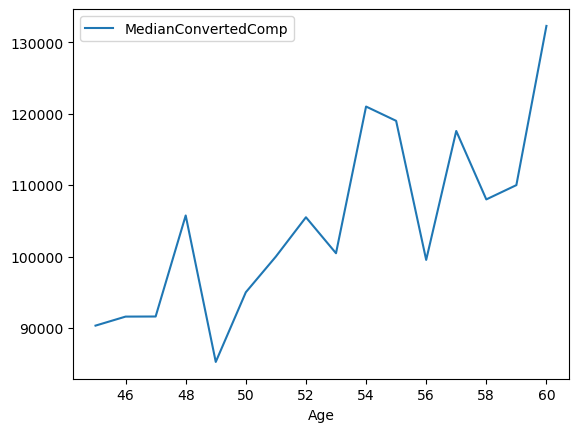

In [32]:
df_age.plot.line(x='Age',y='MedianConvertedComp')
plt.show()

### Majority of the survey responders are

In [33]:
QUERY = """
SELECT *
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
listCol = list(range(0,15))
data.iloc[[0],listCol]

######## Ese dato no estaba aca

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,3,16,Less than 1 year


In [34]:
QUERY = """
SELECT DevType, COUNT(DevType) AS NumOf
FROM DevType
Group BY DevType
ORDER BY NumOf DESC
"""
data = pd.read_sql_query(QUERY,conn)

data
#Developer, full-stack BUT INCORRECT

#Developer - back-end CORRECT !!!!!!!! 

,DevType,NumOf
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


### Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation are there between Age and median ConvertedComp? 

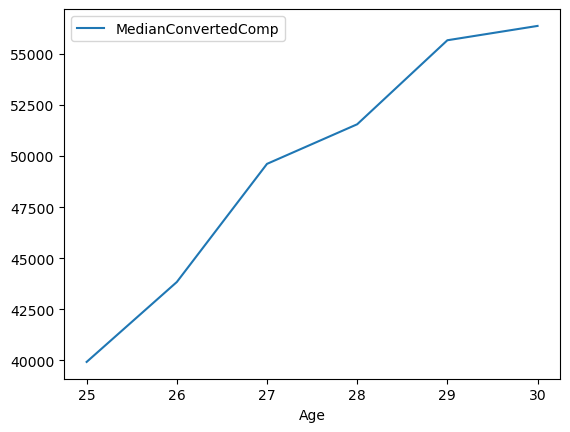

In [35]:
QUERY = """
SELECT Age, ConvertedComp as MedianConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
ORDER BY age
"""
data = pd.read_sql_query(QUERY,conn)
#data.head(15)
df_age = data.groupby('Age').median()
#data.plot( kind= 'area', x = 'WorkWeekHrs', y = 'CodeRevHrs')
#plt.show()
df_age.reset_index(inplace=True)
df_age.plot.line(x='Age',y='MedianConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [36]:
QUERY = """
SELECT MainBranch
FROM master
"""
data = pd.read_sql_query(QUERY,conn)
data.head()

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


In [37]:
df_counts = data['MainBranch'].value_counts()


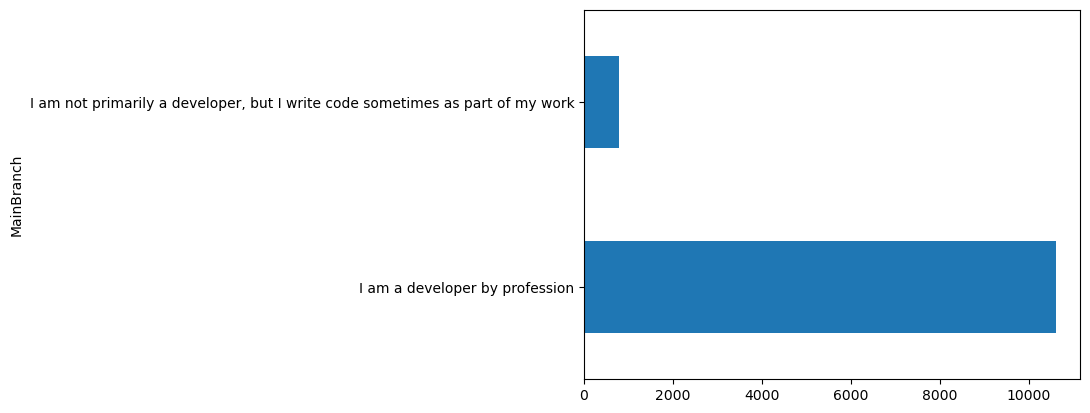

In [38]:
df_counts.plot.barh()
#data.plot.barh(x='MainBranch')
plt.show()

Close the database connection.


In [39]:
conn.close()

| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
